# In this notebook I write the script to call MuhRec on all time bins created by the TOF_BinImages

## I furthermore create the picture for the Neuwave abstract 

In [67]:
%%time
from subprocess import call
from math import fmod
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import os
import shutil
import numpy as np
# %matplotlib inline
%matplotlib notebook

from astropy.io import fits
import xml.etree.ElementTree as ET

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


Wall time: 0 ns


In [3]:
%%time

projpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/"
destpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin" #it is actually 250! TO CORRECT
# path to the application
muhrec=r"C:/Users/carminati_c/Desktop/imagingscience/muhrecCLI.exe"
# cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Recon_WhiteBeam/ReconConfig.xml"
cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_WhiteBeam/ReconConfig.xml"
#first try
# filemask ="projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00000.fits"
# obmask ="projections:obfilemask=D:/Kaestner/ISIS_IAEAData\RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_ob_binned_00000.fits"
obfirstindex ="projections:obfirstindex=2"
obcount ="projections:obcount=2"
# path = r"/bin0000"
# outputpath="matrix:path="+destpath+path

# print(outputpath)



first_bin=0
last_bin=165
for i in range(first_bin, last_bin):
    filemask ="projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_"+str(i).zfill(5)+".fits"
    path = r"/bin"+str(i).zfill(4)
    outputpath="matrix:path="+destpath+path

    obmask ="projections:obfilemask=D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_tomo_binned_"+str(i).zfill(5)+".fits"
    print(filemask)
    print(outputpath)
#     print(obmask)

    if not os.path.exists(destpath+path):
        os.makedirs(destpath+path)

#     print(muhrec)
#     print(cfgpath)
    call([muhrec, "-f", cfgpath, filemask, obmask, obfirstindex, obcount, outputpath])


projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00000.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0000
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00001.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0001
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00002.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0002
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00003.fits
matrix:

projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00030.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0030
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00031.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0031
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00032.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0032
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00033.fits
matrix:

projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00060.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0060
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00061.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0061
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00062.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0062
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00063.fits
matrix:

projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00090.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0090
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00091.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0091
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00092.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0092
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00093.fits
matrix:

projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00120.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0120
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00121.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0121
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00122.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0122
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00123.fits
matrix:

projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00150.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0150
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00151.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0151
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00152.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0152
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00153.fits
matrix:

projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00179.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0179
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00180.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0180
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00181.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0181
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00182.fits
matrix:

projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00212.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0212
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00213.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0213
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00214.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0214
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00215.fits
matrix:

projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00243.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0243
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00244.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0244
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00245.fits
matrix:path=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin/bin0245
projections:filemask=D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned/IMAT_tomo_binned_00246.fits
matrix:

In [139]:
# Here I try to re-run by changing the xml file, as I need to change the filenames of the BBexternals

# Open original file
et = ET.parse('D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_WhiteBeam_BBcorrected/ReconConfig.xml')
root = et.getroot()


#whit this I find all modules in the pre-processing chain
for module in root.findall('./processchain/preprocessing/module'):
    name= module.find('modulename')
    print(name.text)



BBmodule = root.find('./processchain/preprocessing/module/modulename') ## find the first one, which is always the BBLogNorm
BB_OB_ext_name=root.find('./processchain/preprocessing/module/parameters/BB_OB_ext_name')
BB_sample_ext_name=root.find('./processchain/preprocessing/module/parameters/BB_sample_ext_name')

filemask = root.find('./projections/filemask')
outputpath = root.find('./matrix/path')
obmask = root.find('./projections/obfilemask')
obfirstindex = root.find('./projections/obfirstindex')
projpath = root.find('./projections/path')
projrefpath = root.find('./projections/referencepath')

## Uncomment this to check the original texts
# print(BBmodule)
# print(BBmodule.text)
# print(BB_OB_ext_name.text)
# print(BB_sample_ext_name.text)
# print(filemask.text)
# print(outputpath.text)
# print(obmask.text)
# print(obfirstindex.text)
# print(projpath.text)
# print(projrefpath.text)



# Loop over the bins to create the ReconConfig
first_bin=0
last_bin=165
for i in range(first_bin, last_bin):
    destpath=r"D:Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_recon_binSum_165bin_249_BBcorrected" 
    path = r"/bin"+str(i).zfill(4)+"/"
    BB_OB_ext_name.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_'+str(i).zfill(4)+'/BackGround_0000.fits'
    BB_sample_ext_name.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/Backgrounds/Background_binned/Bin_'+str(i).zfill(4)+'/BackGround_####.fits'
    filemask.text = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/Sample/angle####_Corrected_Binned\IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    outputpath.text = destpath+path
    obmask.text = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft#_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    obfirstindex.text=str(2)
    projpath.text=' '
    projrefpath.text=' '

    fileconfigpath = 'D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations'
    fileconfigname = '/ReconConfig_bin'+str(i).zfill(4)+'.xml'
    et.write(fileconfigpath+fileconfigname) # It works!!
    if not os.path.exists(destpath+path):
        os.makedirs(destpath+path)

BBLogNorm
MorphSpotClean
ProjectionFilterSingle


In [140]:
# I test now on the first if it works
muhrec=r"C:/Users/carminati_c/muhrec/muhrecCLI.exe"
cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin"+str(0).zfill(4)+".xml"
%%time

for i in range(1, last_bin):
    cfgpath=r"D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin"+str(i).zfill(4)+".xml"
    print('Running: ...... ', cfgpath)
    call([muhrec, "-f", cfgpath]) # It does!

Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0001.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0002.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0003.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0004.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0005.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0006.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0007.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PS

Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0062.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0063.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0064.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0065.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0066.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0067.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0068.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PS

Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0123.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0124.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0125.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0126.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0127.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0128.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PSI_Cylinder/Sample/RB1730044/Tomo_test/CT_configurations/ReconConfig_bin0129.xml
Running: ......  D:/Kaestner/ISIS_IAEAData/RB1730044/PS

In [ ]:
# Here i try to make some plots

<IPython.core.display.Javascript object>


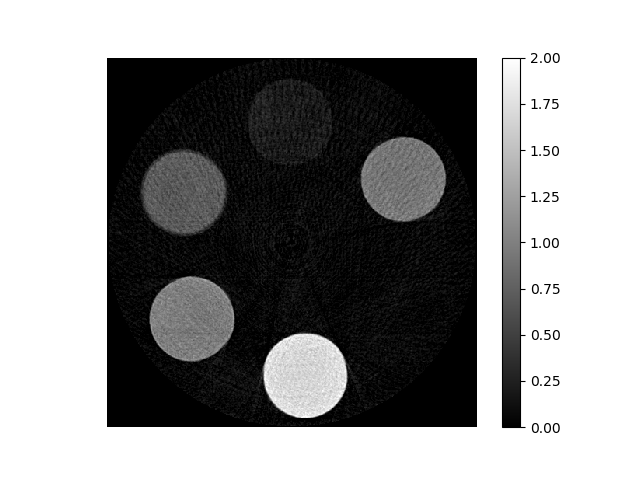

<IPython.core.display.Javascript object>


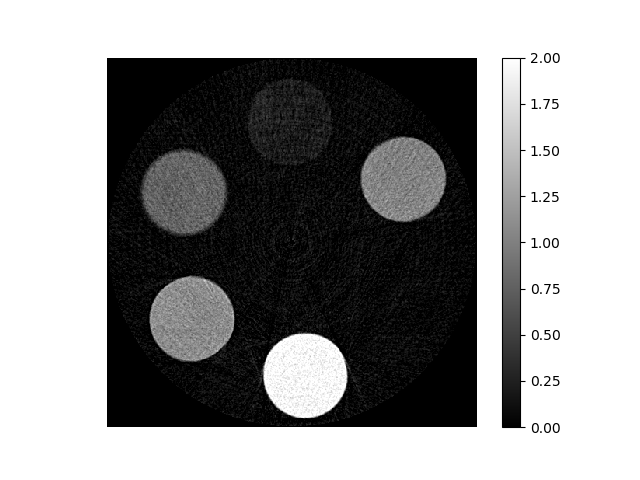

In [66]:
# img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\Recon_WhiteBeam\slice_0405.tif')
img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam\slice_0405.tif')
img_WB_BB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected\slice_0405.tif')

plt.figure()
cs=plt.imshow(img_WB, cmap='gray',vmin=0.0, vmax=2)
plt.axis('off')
plt.colorbar(cs)
plt.savefig('WhiteBeam.tif') # This is also to be updated as i
# scalebar = AnchoredSizeBar(plt.get_axis, 0.055,'mm','upper right')

# plt.add_artist(scalebar)

plt.figure()
cs=plt.imshow(img_WB_BB, cmap='gray',vmin=0.0, vmax=2)
plt.axis('off')
plt.colorbar(cs)
plt.savefig('WhiteBeam_BB.tif') # This is also to be updated as i


In [ ]:
# TODO:
# [OK] read this very sama image for the entire spectrum
# [] bin accordingly the spectrum
# [] make the plots in some meaningful ROIs
# RoiS

In [141]:
# This are the images without BB correction
nBins=165 
spectrum_img=np.zeros((476,476,nBins))
print(np.shape(spectrum_img))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    spectrum_img[:,:,i]=io.imread(filename)
    print(filename)

(476, 476, 165)
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0000\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0001\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0002\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0003\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0004\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0005\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0006\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249

D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0069\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0070\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0071\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0072\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0073\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0074\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0075\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0076\slice_0

D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0135\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0136\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0137\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0138\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0139\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0140\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0141\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\bin0142\slice_0

In [ ]:
# io.imshow(spectrum_img[:,:,80])
# io.imshow(img_WB[150:200,80:140]) #Ti
# io.imshow(img_WB[55:100,200:250]) #Fe
# io.imshow(img_WB[300:350, 80:120]) #Pb
#io.imshow(img_WB[128:180,350:400]) #Ni
#io.imshow(img_WB[380:430,230:280]) #Cu a little bit high number, no?

In [142]:
# I now load the images with BB correction
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
    print(filename)

(476, 476, 165)
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0000\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0001\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0002\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0003\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0004\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0005\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0006\slice_0405.tif
D:\Kaestner\ISIS_I

D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0061\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0062\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0063\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0064\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0065\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0066\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0067\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB173004

D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0121\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0122\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0123\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0124\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0125\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0126\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\bin0127\slice_0405.tif
D:\Kaestner\ISIS_IAEAData\RB173004

In [26]:
myTOF = np.genfromtxt('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\\angle0\IMAT00004675_Tomo_test_000_Spectra.txt', usecols=0)

In [27]:
def tof2l(tof):
    l=lambda0+h/m*(tof-t0)/(L)/1e-10
    return l

def l2tof(l):
    tof=t0+(l*1e-10)*(L)*m/h
    return tof

In [28]:
t0 =  0.0
L = 56
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
lambda0=0

In [29]:
myLambda = tof2l(myTOF)

<IPython.core.display.Javascript object>


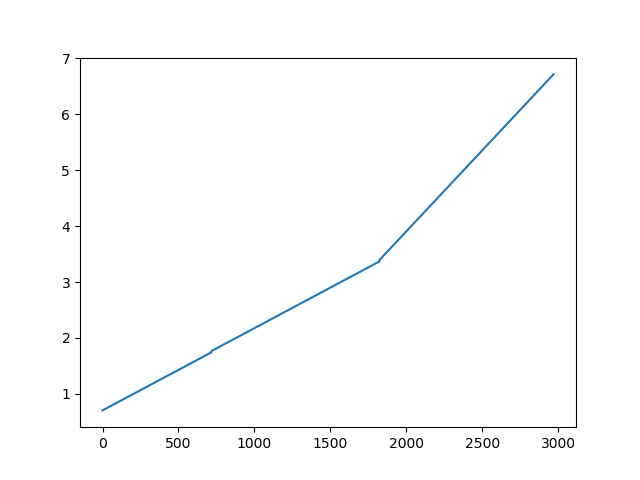

(2971,)


In [30]:
plt.plot(myLambda)
print(np.shape(myLambda))

In [16]:
2970/165

18.0

In [143]:
#spectrum TI ROI: [150:200,80:140]
Ti = np.zeros(nBins)
Fe = np.zeros(nBins)
Pb = np.zeros(nBins)
Ni = np.zeros(nBins)
Cu = np.zeros(nBins)
Ti_BB = np.zeros(nBins)
Fe_BB = np.zeros(nBins)
Pb_BB = np.zeros(nBins)
Ni_BB = np.zeros(nBins)
Cu_BB = np.zeros(nBins)

for i in range(0,nBins):
    Ti[i] = np.median(spectrum_img[50:200,80:140,i])
    Pb[i] = np.median(spectrum_img[55:100,200:250,i])
    Fe[i] = np.median(spectrum_img[300:350, 80:120,i])
    Cu[i] = np.median(spectrum_img[128:180,350:400,i])
    Ni[i] = np.median(spectrum_img[380:430,230:280,i])
    Ti_BB[i] = np.median(spectrum_img_BB[50:200,80:140,i])
    Pb_BB[i] = np.median(spectrum_img_BB[55:100,200:250,i])
    Fe_BB[i] = np.median(spectrum_img_BB[300:350, 80:120,i])
    Cu_BB[i] = np.median(spectrum_img_BB[128:180,350:400,i])
    Ni_BB[i] = np.median(spectrum_img_BB[380:430,230:280,i])
    

In [144]:
lambda_bin = myLambda[1::18]

In [145]:
print(np.shape(lambda_bin))
print(np.shape(Ti))
print(np.shape(myLambda))

(165,)
(165,)
(2971,)


In [37]:
filename ="Cu.txt"
data_Cu = np.genfromtxt(filename)
print(np.shape(data_Cu))

data_Fe = np.genfromtxt('Fe.txt')
data_Pb=np.genfromtxt('Pb.txt')
data_Ti=np.genfromtxt('Ti.txt')
data_Ni=np.genfromtxt('Ni.txt')


(300, 2)


<IPython.core.display.Javascript object>


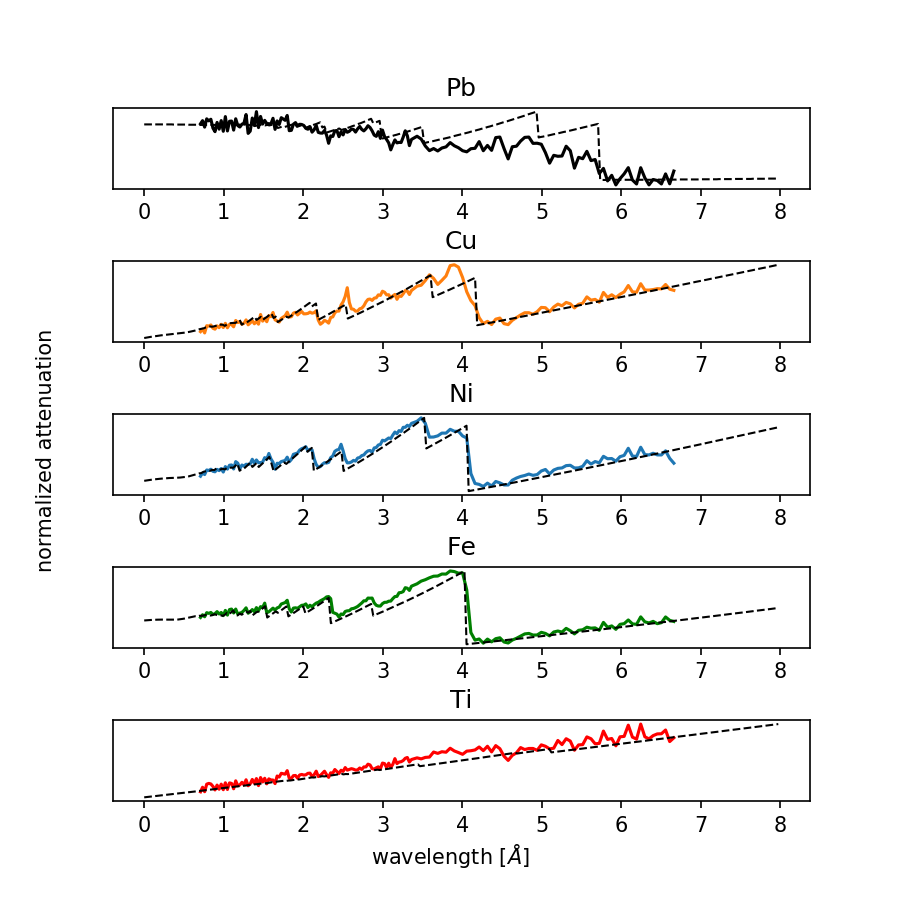

In [151]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(6, 6))


plt.subplot(513)
plt.plot(lambda_bin, Ni/np.max(Ni))
plt.plot(data_Ni[:,0],data_Ni[:,1]/np.max(data_Ni[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe/np.max(Fe),'g')
plt.plot(data_Fe[:,0],data_Fe[:,1]/np.max(data_Fe[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti/np.max(Ti),'r')
plt.plot(data_Ti[:,0],data_Ti[:,1]/np.max(data_Ti[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb/np.max(Pb), 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1]/np.max(data_Pb[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu/np.max(Cu), 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1]/np.max(data_Cu[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Cu')

plt.subplots_adjust(hspace=0.9)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center')
fig.text(0.04, 0.5, 'normalized attenuation', va='center', rotation='vertical')

plt.savefig('spectra_plots_normalized.tiff')

<IPython.core.display.Javascript object>


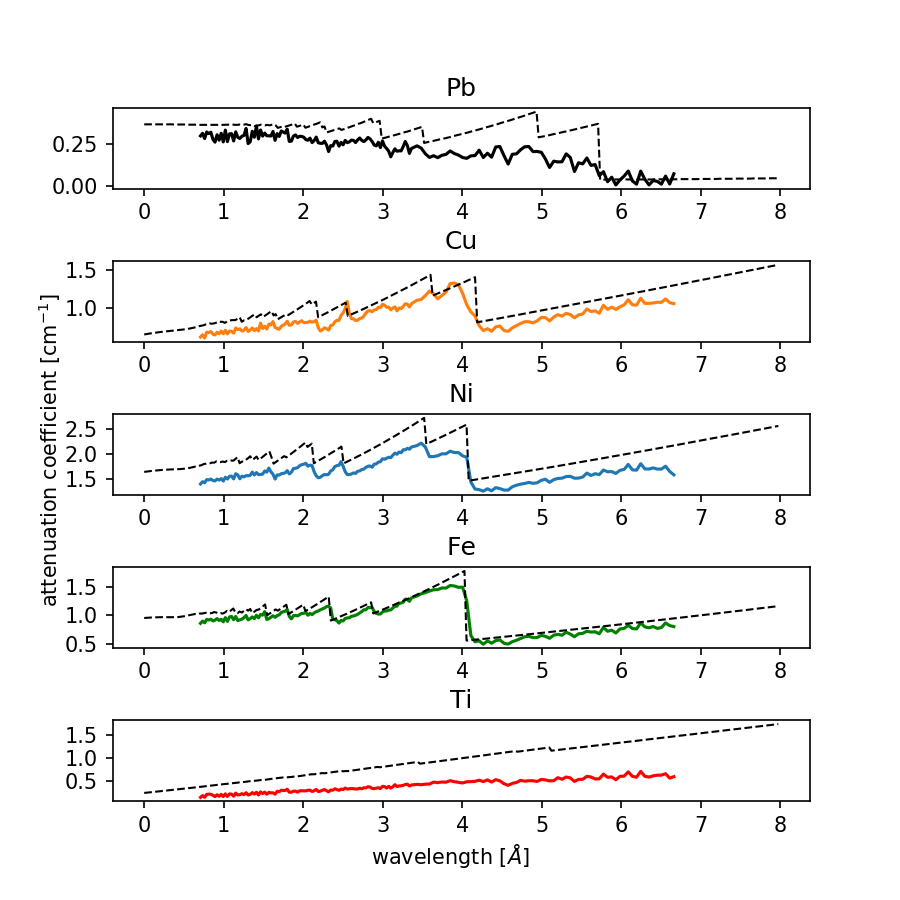

In [157]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(6, 6))


plt.subplot(513)
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')

plt.subplots_adjust(hspace=0.9)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center')
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical')

plt.savefig('spectra_plots.tiff')

<IPython.core.display.Javascript object>


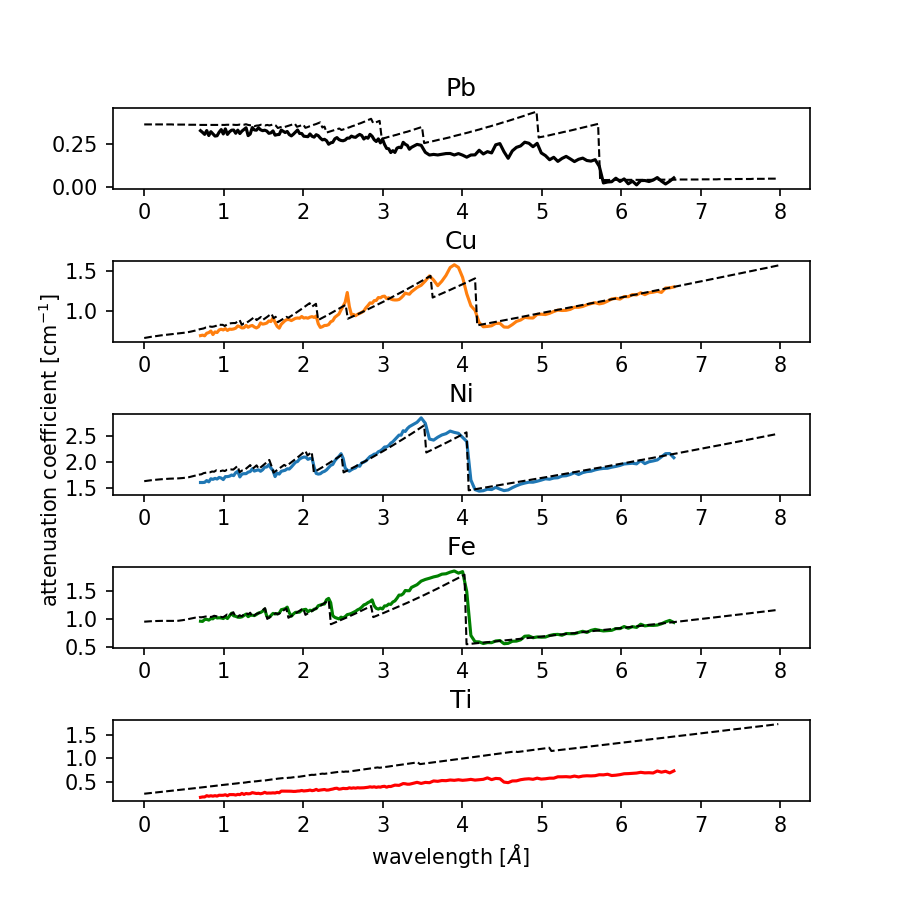

In [156]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(6, 6))


plt.subplot(513)
plt.plot(lambda_bin, Ni_BB)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni') 


plt.subplot(514)
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')

plt.subplot(515)
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')

plt.subplot(511)
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')

plt.subplot(512)
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')

plt.subplots_adjust(hspace=0.9)
fig.text(0.5, 0.04, 'wavelength [$\AA$]', ha='center')
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical')

plt.savefig('spectra_plots_BBcorrected.tiff')

<IPython.core.display.Javascript object>


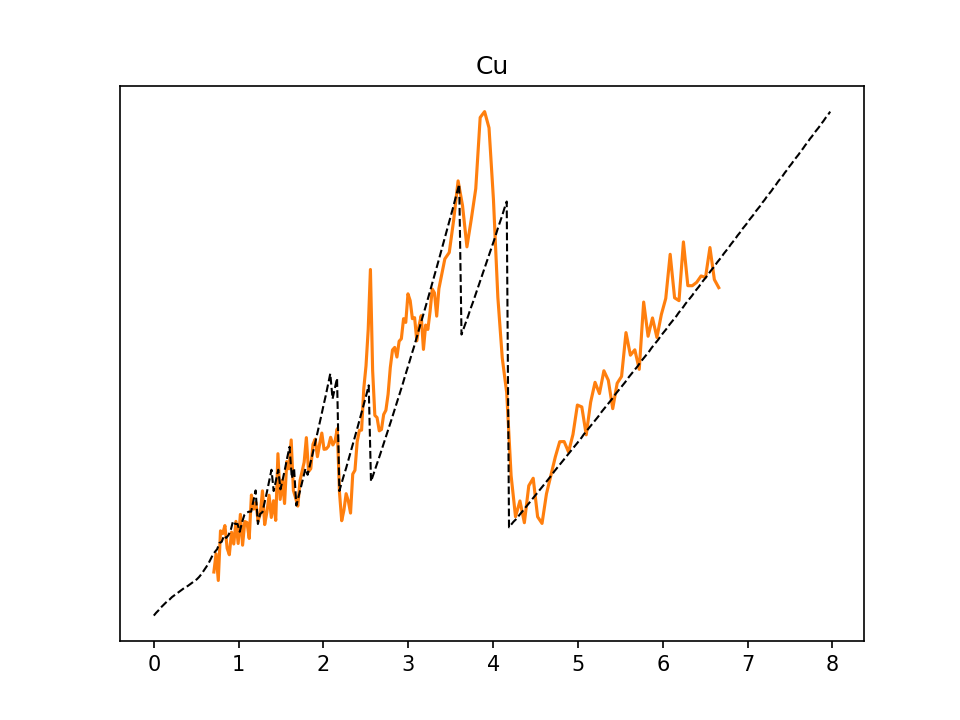

<IPython.core.display.Javascript object>


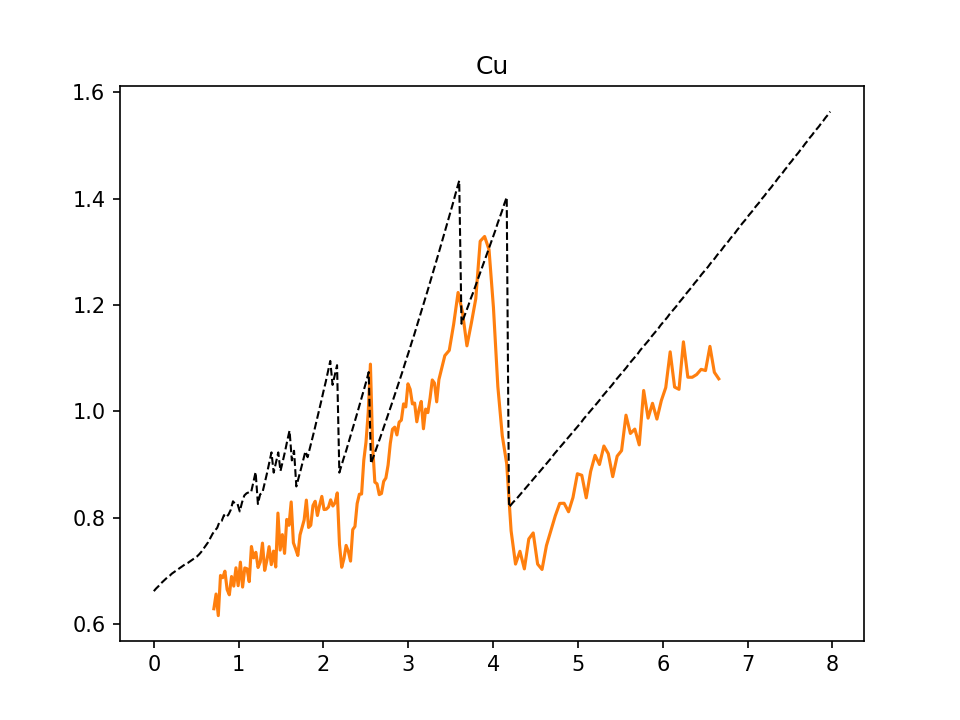

<IPython.core.display.Javascript object>


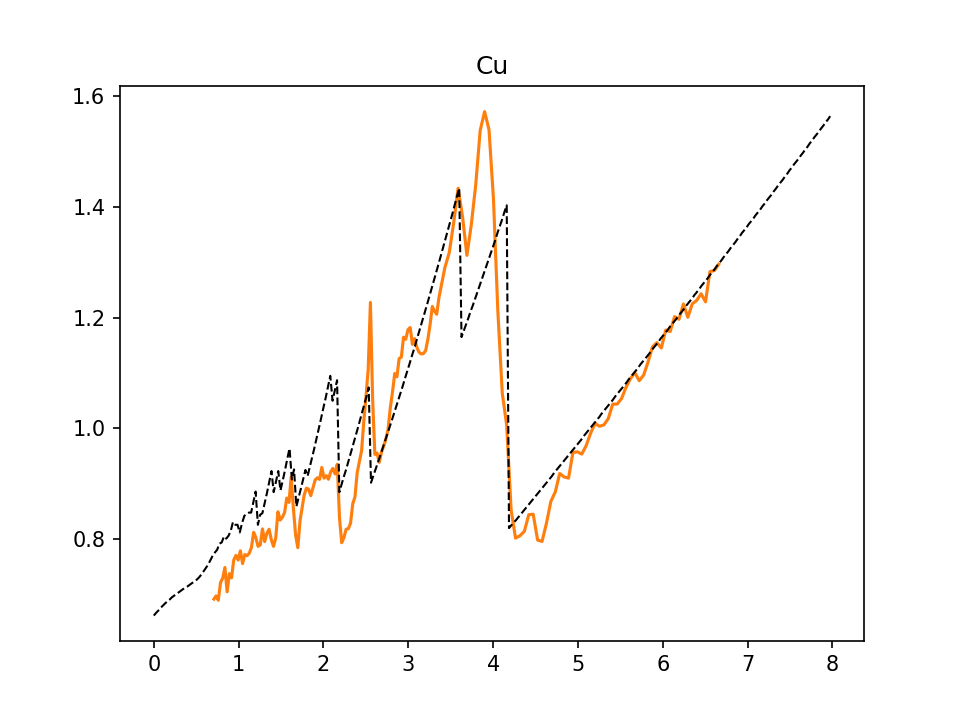

Text(0.5, 1.0, 'Cu')

In [146]:
plt.figure()
plt.plot(lambda_bin, Cu/np.max(Cu), 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1]/np.max(data_Cu[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Cu')

plt.figure()
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')


plt.figure()
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu')

<IPython.core.display.Javascript object>


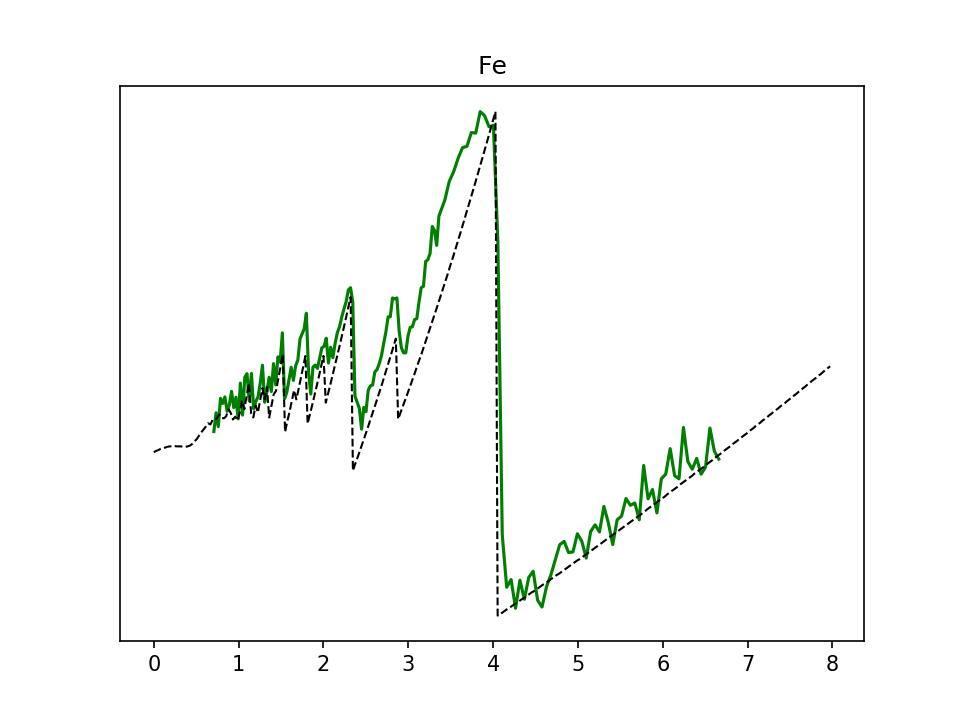

<IPython.core.display.Javascript object>


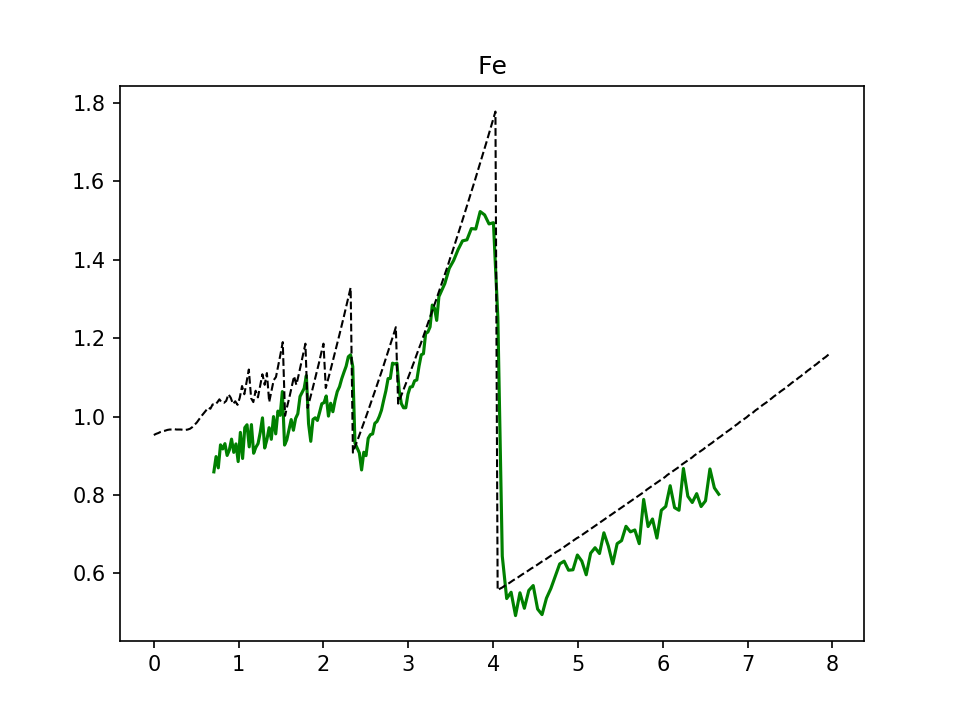

<IPython.core.display.Javascript object>


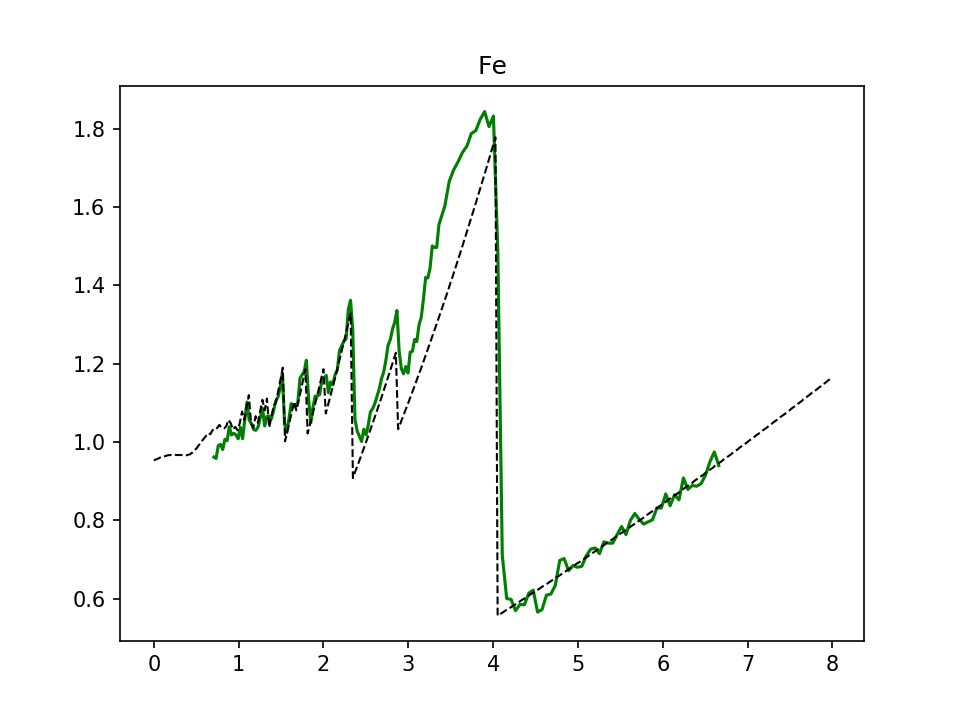

Text(0.5, 1.0, 'Fe')

In [147]:
plt.figure()
plt.plot(lambda_bin, Fe/np.max(Fe),'g')
plt.plot(data_Fe[:,0],data_Fe[:,1]/np.max(data_Fe[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Fe')

plt.figure()
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')

plt.figure()
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe')

<IPython.core.display.Javascript object>


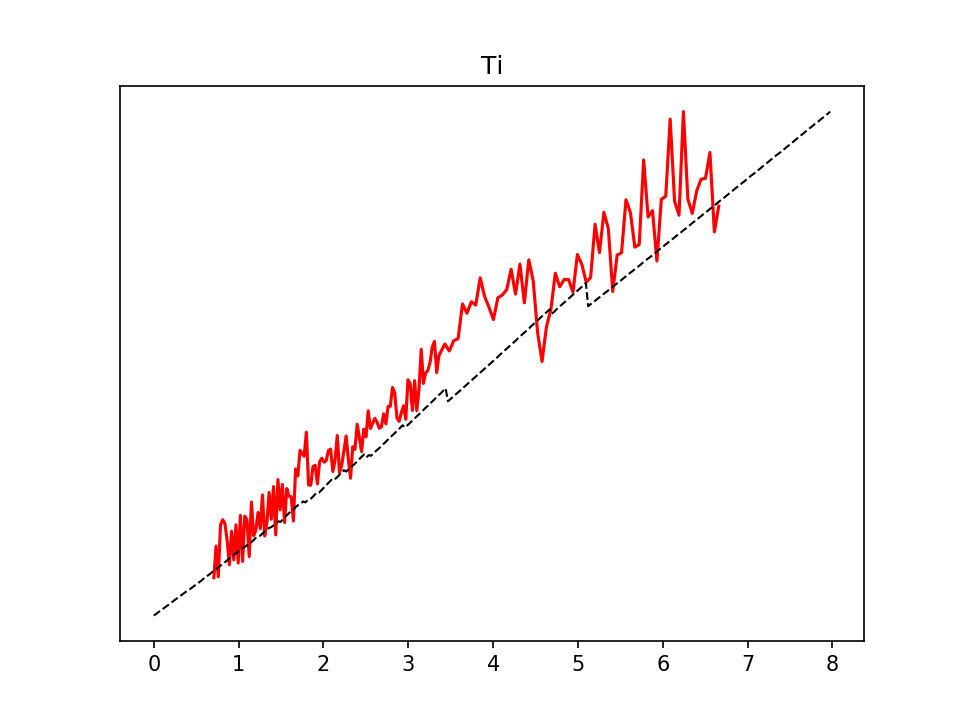

<IPython.core.display.Javascript object>


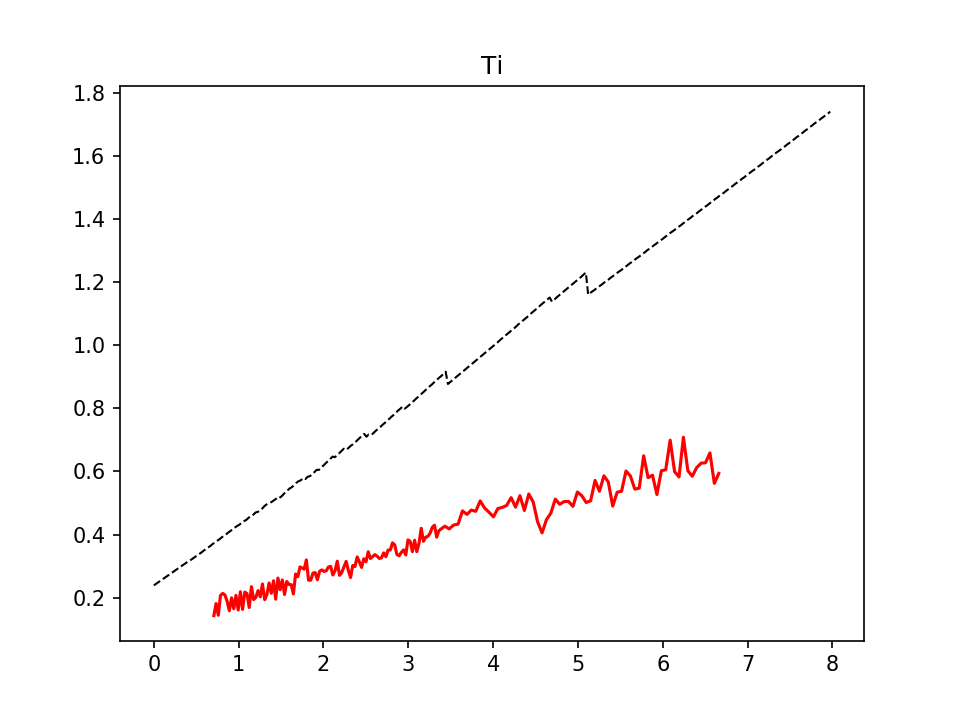

<IPython.core.display.Javascript object>


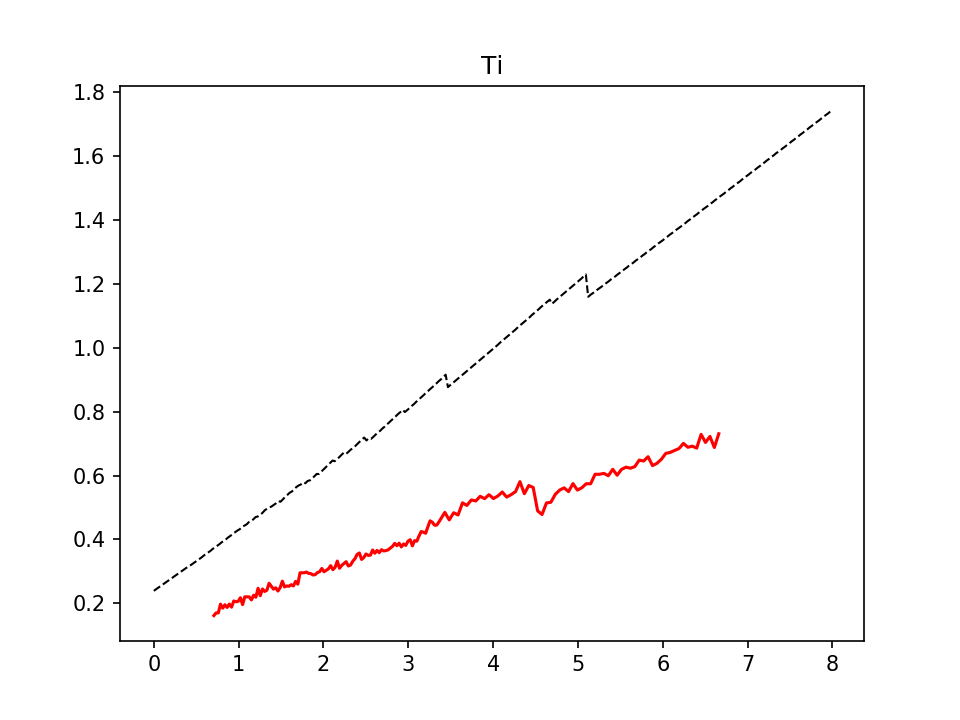

Text(0.5, 1.0, 'Ti')

In [148]:
plt.figure()
plt.plot(lambda_bin, Ti/np.max(Ti),'r')
plt.plot(data_Ti[:,0],data_Ti[:,1]/np.max(data_Ti[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ti')

plt.figure()
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')

plt.figure()
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti')

<IPython.core.display.Javascript object>


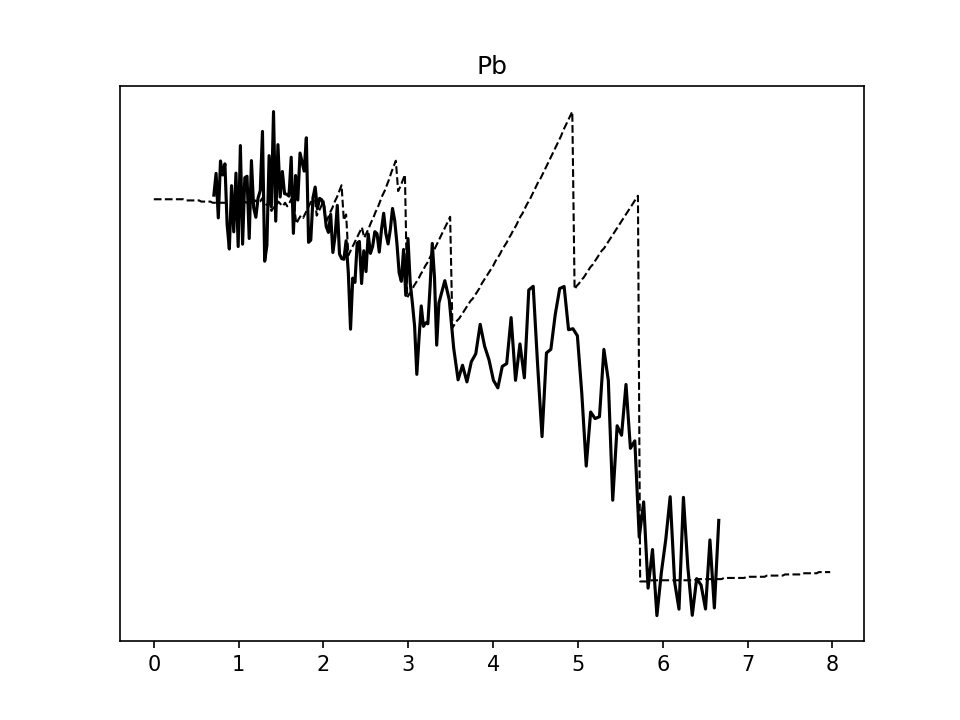

<IPython.core.display.Javascript object>


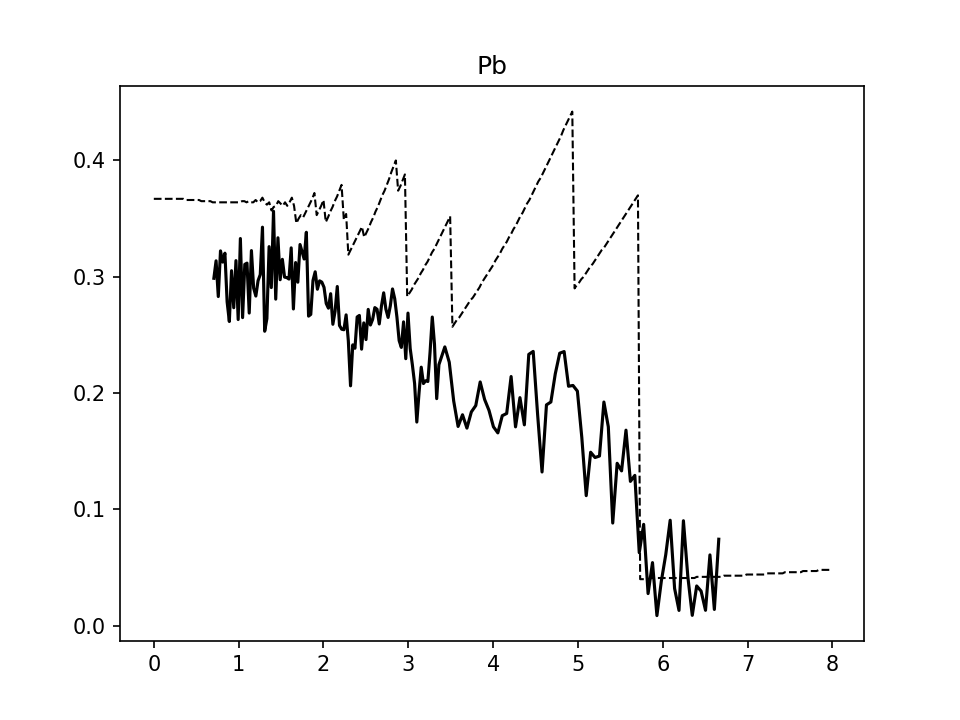

<IPython.core.display.Javascript object>


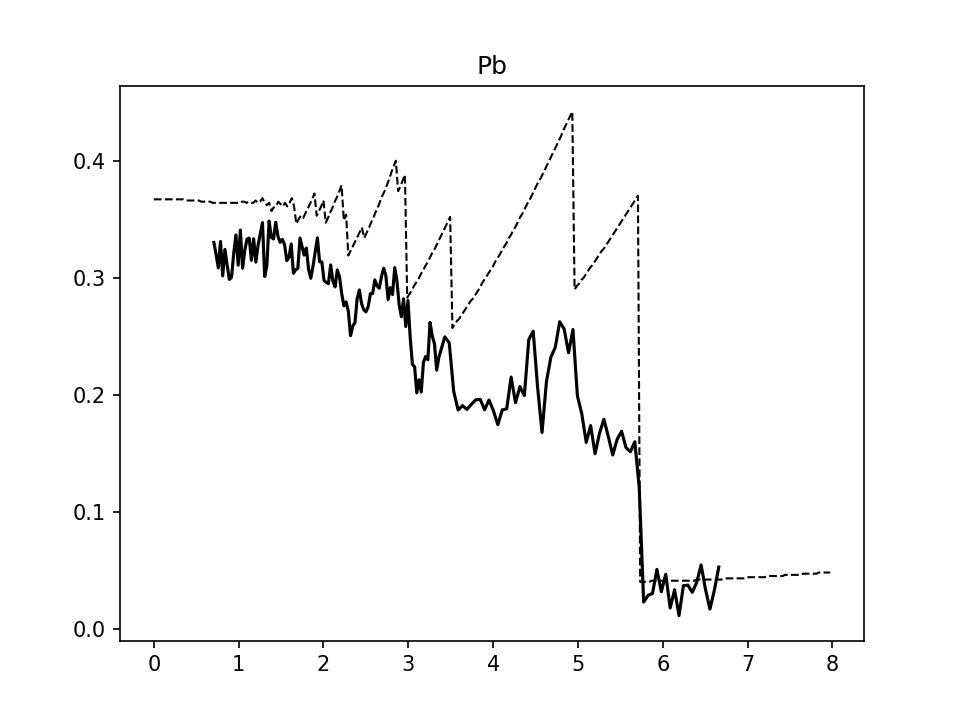

Text(0.5, 1.0, 'Pb')

In [150]:
plt.figure()
plt.plot(lambda_bin, Pb/np.max(Pb), 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1]/np.max(data_Pb[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Pb')

plt.figure()
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')

plt.figure()
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb')

<IPython.core.display.Javascript object>


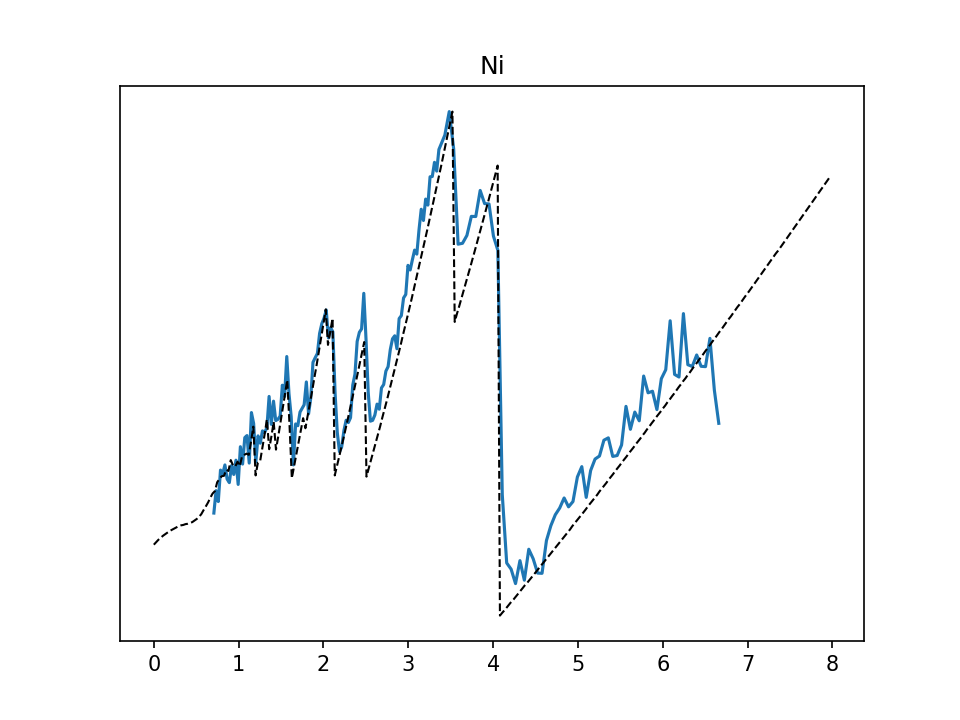

<IPython.core.display.Javascript object>


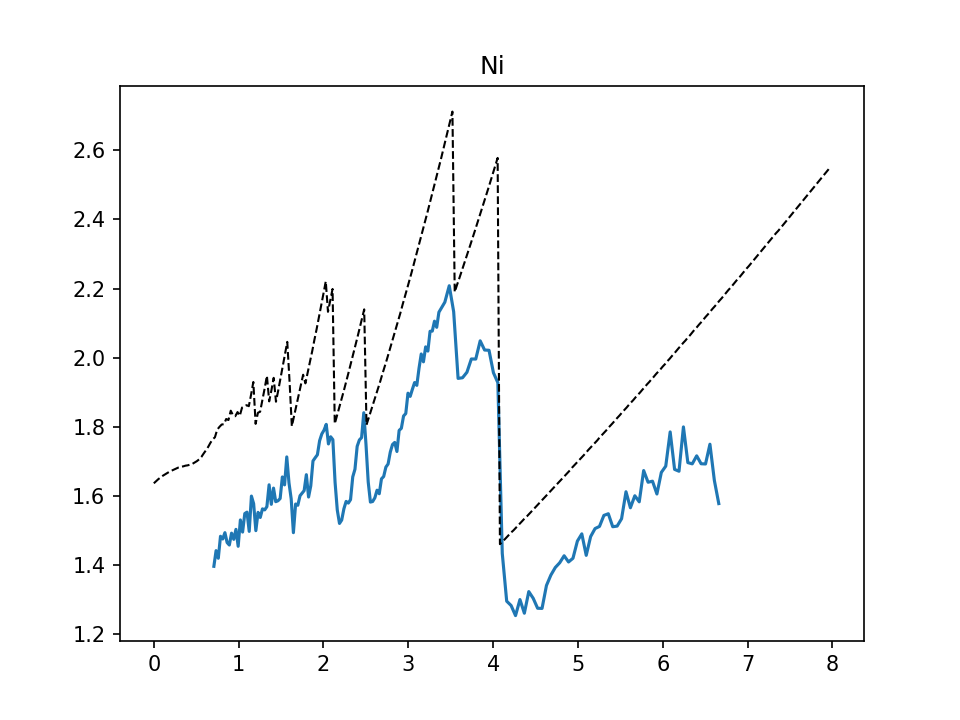

<IPython.core.display.Javascript object>


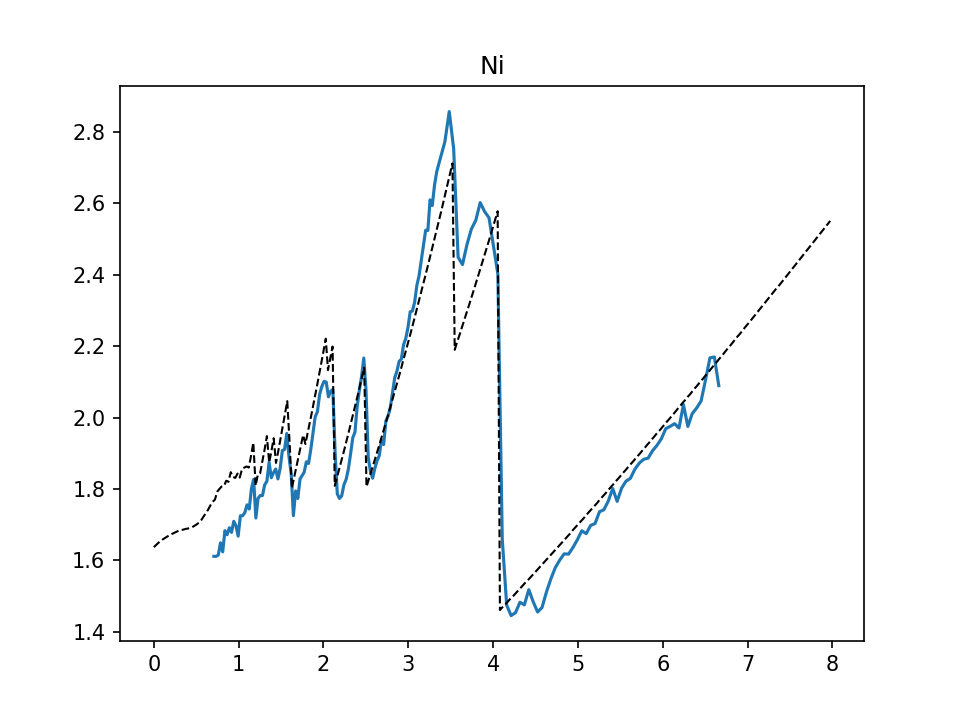

Text(0.5, 1.0, 'Ni')

In [149]:
plt.figure()
plt.plot(lambda_bin, Ni/np.max(Ni))
plt.plot(data_Ni[:,0],data_Ni[:,1]/np.max(data_Ni[:,1]),'--k',linewidth=1)
plt.yticks([], [])
plt.title('Ni') 

plt.figure()
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni')

plt.figure()
plt.plot(lambda_bin, Ni_BB)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni')
